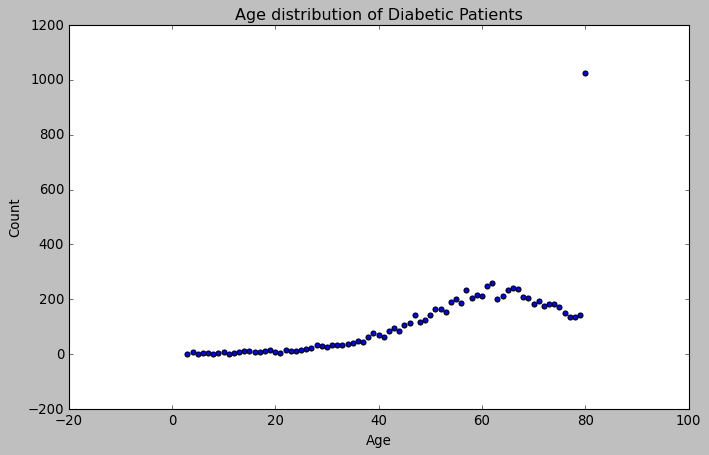

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#df 데이터프레임에 다운받은 데이터 불러오기
df = pd.read_csv('diabetes_prediction_dataset.csv')

#필요한 정보만 df2 데이터프레임에 저장하면서 데이터 프레임 컬럼 순서 변경
df2 = df[['diabetes','age','hypertension','bmi']]
#먼저 나이에 대한 당뇨병 환자 수를 확인하기 위해 추출
df3 = df2[['diabetes','age']]
#diabetes를 행 인덱스로 설정
df4 = df3.set_index(['diabetes'])
#diabetes에 대한 age 데이터프레임 생성(df5)
df5 = df4['age'].groupby('diabetes').value_counts()

# diabetes가 1인 데이터만 필터링
df_diabetes = df5.loc[1]

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df_diabetes.index, df_diabetes.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of Diabetic Patients')
plt.show()


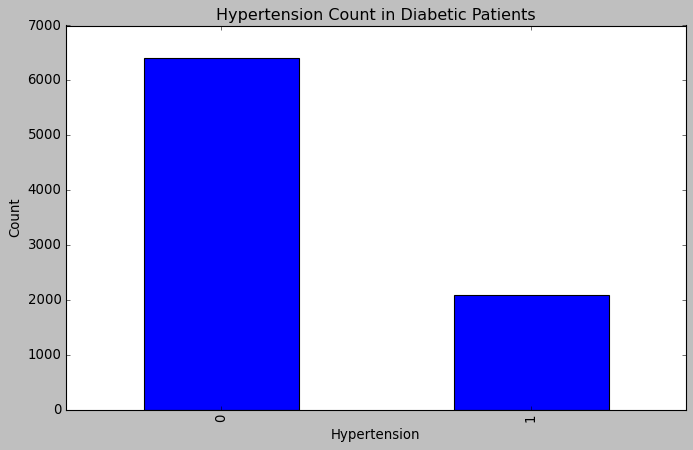

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#df 데이터프레임에 다운받은 데이터 불러오기
df = pd.read_csv('diabetes_prediction_dataset.csv')

#필요한 정보만 df2 데이터프레임에 저장하면서 데이터 프레임 컬럼 순서 변경
df2 = df[['diabetes','age','hypertension','bmi']]
#먼저 고혈압에 대한 당뇨병 환자 수를 확인하기 위해 추출
df3 = df2[['diabetes', 'hypertension']]
#diabetes를 행 인덱스로 설정
df4 = df3.set_index(['diabetes'])
#diabetes에 대한 hypertension 데이터프레임 생성(df5)
df5 = df4['hypertension'].groupby('diabetes').value_counts()
# diabetes가 1인 데이터만 필터링
df_diabetes = df5.loc[1]
#막대그래프 그리기
df_diabetes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Hypertension Count in Diabetic Patients')
plt.show()

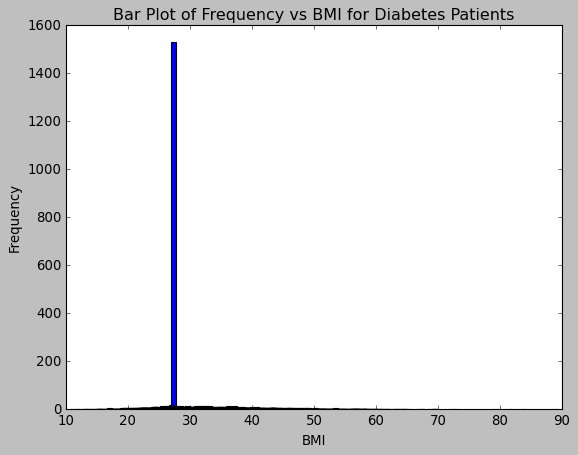

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#df 데이터프레임에 다운받은 데이터 불러오기
df = pd.read_csv('diabetes_prediction_dataset.csv')

#필요한 정보만 df2 데이터프레임에 저장하면서 데이터 프레임 컬럼 순서 변경
df2 = df[['diabetes','age','hypertension','bmi']]
#먼저 bmi에 대한 당뇨병 환자 수를 확인하기 위해 추출
df3 = df2[['diabetes', 'bmi']]
#diabetes를 행 인덱스로 설정
df4 = df3.set_index(['diabetes'])
#diabetes에 대한 bmi 데이터프레임 생성(df5)
df5 = df4['bmi'].groupby('diabetes').value_counts()
# diabetes가 1인 데이터만 필터링
df_diabetes = df5.loc[1]
# df_diabetes 인덱스 리셋
df_diabetes_reset = df_diabetes.reset_index()

# 콜룸의 이름 재정의
df_diabetes_reset.columns = ['bmi', 'frequency']

# 막대 그래프 그리기
plt.bar(df_diabetes_reset['bmi'], df_diabetes_reset['frequency'])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Bar Plot of Frequency vs BMI for Diabetes Patients')
plt.show()

C:\Users\parkj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


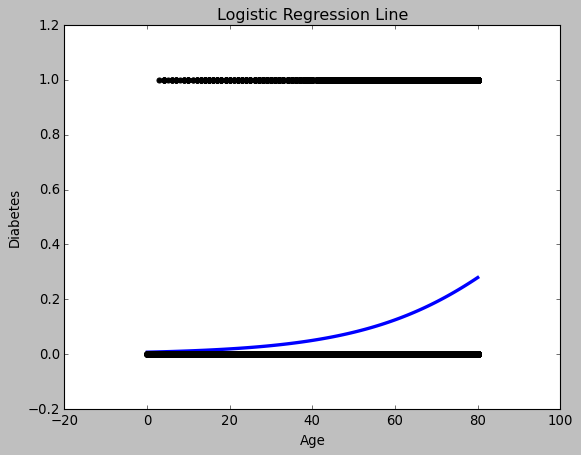

In [179]:
#첫 번째 age와 diabetes의 연관성을 머신러닝한 코드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#df 데이터프레임에 다운받은 데이터 불러오기
df = pd.read_csv('diabetes_prediction_dataset.csv')

#필요한 정보만 df2 데이터프레임에 저장하면서 데이터 프레임 컬럼 순서 변경
df2 = df[['diabetes','age','hypertension','bmi']]
#먼저 나이에 대한 당뇨병 환자 수를 확인하기 위해 추출
df3 = df2[['diabetes','age']]
#diabetes를 행 인덱스로 설정
df4 = df3.set_index(['diabetes'])
#diabetes에 대한 age 데이터프레임 생성(df5)
df5 = df4['age'].groupby('diabetes').value_counts()

# diabetes가 1인 데이터만 필터링
df_diabetes = df5.loc[1]

#여기서부터 머신러닝
# 로지스틱 회귀 모델을 학습
model = LogisticRegression()
model.fit(df2[['age']], df2['diabetes'])

# 'age'의 최소값과 최대값 사이에 100개의 점을 생성
ages = np.linspace(df2['age'].min(), df2['age'].max(), 100).reshape(-1, 1)
# 생성한 점들에 대한 예측값을 계산
predictions = model.predict_proba(ages)[:,1]
# 원본 데이터와 회귀선 그리기
plt.scatter(df2['age'], df2['diabetes'], color='black', zorder=20)
plt.plot(ages, predictions, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Logistic Regression Line')
plt.show()